# How to evaluate embeddings using linear algebra and analogies 

The dimensions of the word and phrase vectors do not have an explicit meaning. However, the embeddings encode similar usage as proximity in the latent space in a way that carries over to semantic relationships. This results in the interesting properties that analogies can be expressed by adding and subtracting word vectors.

Just as words can be used in different contexts, they can be related to other words in different ways, and these relationships correspond to different directions in the latent space. Accordingly, there are several types of analogies that the embeddings should reflect if the training data permits.

The word2vec authors provide a list of several thousand relationships spanning aspects of geography, grammar and syntax, and family relationships to evaluate the quality of embedding vectors (see directory [analogies](data/analogies)).

## Data

<div style='direction:rtl; font-family: "B Nazanin"; font-size: 20px;'> 
در این نوت بوک نیاز است تا از داده‌های موجود در فایل analogies-en.txt که در فولدر data موجود در همین فولدر است، استفاده شود.

## Imports

In [1]:
using Pkg

In [2]:
#Pkg.add("DataFrames")
#Pkg.add("Plots")

In [3]:
using DataFrames
using Plots

### Settings

In [4]:
analogy_path = joinpath("data", "analogies-en.txt")

"data\\analogies-en.txt"

## Evaluation: Analogies

In [5]:
f = open(analogy_path, "r")
s = read(f, String)
close(f)

In [6]:
lines = split(s, "\n")

25407-element Vector{SubString{String}}:
 ": capital-common-countries  "
 "athens greece baghdad iraq"
 "athens greece bangkok thailand"
 "athens greece beijing china"
 "athens greece berlin germany"
 "athens greece bern switzerland"
 "athens greece cairo egypt"
 "athens greece canberra australia"
 "athens greece hanoi vietnam"
 "athens greece havana cuba"
 "athens greece helsinki finland"
 "athens greece islamabad pakistan"
 "athens greece kabul afghanistan"
 ⋮
 "write writes shuffle shuffles"
 "write writes sing sings"
 "write writes sit sits"
 "write writes slow slows"
 "write writes speak speaks"
 "write writes swim swims"
 "write writes talk talks"
 "write writes think thinks"
 "write writes vanish vanishes"
 "write writes walk walks"
 "write writes work works"
 ""

In [7]:
analogies = Any[]
category = ""

for line ∈ lines
    if startswith(line, ":")
        category = line
    else
        if (line != "")
            push!(analogies, append!([category], split(line, " ")))
        end
    end
end

In [8]:
analogies

25392-element Vector{Any}:
 SubString{String}[": capital-common-countries  ", "athens", "greece", "baghdad", "iraq"]
 SubString{String}[": capital-common-countries  ", "athens", "greece", "bangkok", "thailand"]
 SubString{String}[": capital-common-countries  ", "athens", "greece", "beijing", "china"]
 SubString{String}[": capital-common-countries  ", "athens", "greece", "berlin", "germany"]
 SubString{String}[": capital-common-countries  ", "athens", "greece", "bern", "switzerland"]
 SubString{String}[": capital-common-countries  ", "athens", "greece", "cairo", "egypt"]
 SubString{String}[": capital-common-countries  ", "athens", "greece", "canberra", "australia"]
 SubString{String}[": capital-common-countries  ", "athens", "greece", "hanoi", "vietnam"]
 SubString{String}[": capital-common-countries  ", "athens", "greece", "havana", "cuba"]
 SubString{String}[": capital-common-countries  ", "athens", "greece", "helsinki", "finland"]
 SubString{String}[": capital-common-countries  ", "a

In [9]:
df = DataFrame(category = [String(x[1]) for x ∈ analogies], 
                a = [String(x[2]) for x ∈ analogies], 
                b = [String(x[3]) for x ∈ analogies], 
                c = [String(x[4]) for x ∈ analogies], 
                d = [String(x[5]) for x ∈ analogies])
first(df, 5)

,category,a,b,c,d
,String,String,String,String,String
1,: capital-common-countries,athens,greece,baghdad,iraq
2,: capital-common-countries,athens,greece,bangkok,thailand
3,: capital-common-countries,athens,greece,beijing,china
4,: capital-common-countries,athens,greece,berlin,germany
5,: capital-common-countries,athens,greece,bern,switzerland


In [10]:
value_counts(df, col) = combine(groupby(df, col), nrow)

value_counts (generic function with 1 method)

In [11]:
analogy_cnt = sort(value_counts(df, :category), :nrow, rev=true)
analogy_example = combine(first, groupby(df, :category))
innerjoin(analogy_cnt, analogy_example, on=:category)

,category,nrow,a,b,c,d
,String,Int64,String,String,String,String
1,: capital-world,8556,abuja,nigeria,accra,ghana
2,: city-in-state,4242,chicago,illinois,houston,texas
3,: gram6-nationality-adjective,1640,albania,albanian,argentina,argentinean
4,: gram7-past-tense,1560,dancing,danced,decreasing,decreased
5,: gram3-comparative,1332,bad,worse,big,bigger
6,: gram8-plural,1332,banana,bananas,bird,birds
7,: gram4-superlative,1122,bad,worst,big,biggest
8,: gram5-present-participle,1056,code,coding,dance,dancing
9,: gram1-adjective-to-adverb,992,amazing,amazingly,apparent,apparently


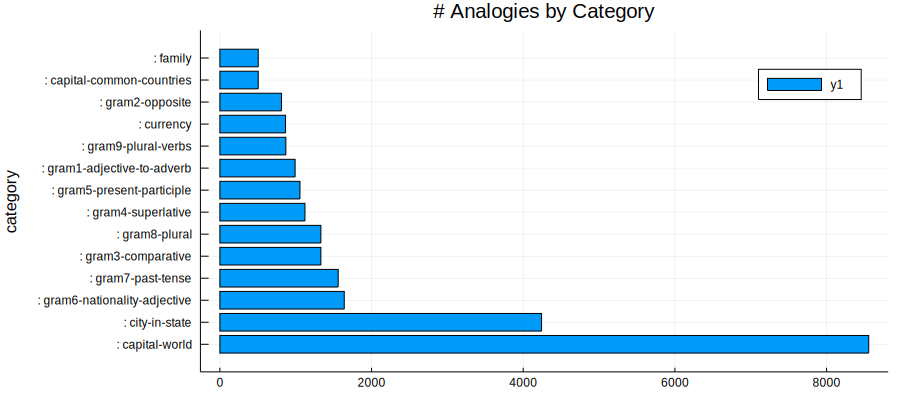

In [12]:
bar(analogy_cnt[:category], analogy_cnt[:nrow], orientation=:horizontal)
plot!(size=(900, 400))
ylabel!("category")
title!("# Analogies by Category")